<a href="https://colab.research.google.com/github/GNE-GitHub/audit-database-analysis/blob/main/Audit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

# قراءة البيانات من ملف CSV
audit_data = pd.read_csv('audit_data_master_csv.csv')

# عرض أول 5 صفوف من البيانات
print(audit_data.head())

# عرض معلومات عامة حول البيانات (الأعمدة، الأنواع، القيم المفقودة)
print(audit_data.info())

# وصف إحصائي للبيانات
print(audit_data.describe())


                   event_time  sequence_number action_id  succeeded  \
0  2024-08-17 06:31:57.367690                1      AUSC       True   
1  2024-08-17 06:37:18.042834                1      SL         True   
2  2024-08-17 06:37:18.042834                1      SL         True   
3  2024-08-17 06:37:18.326834                1      SL         True   
4  2024-08-17 06:37:18.326834                1      SL         True   

   permission_bitmask  is_column_permission  session_id  server_principal_id  \
0                 NaN                 False           9                    1   
1                 NaN                  True          59                  265   
2                 NaN                  True          59                  265   
3                 NaN                  True          59                  265   
4                 NaN                  True          59                  265   

   database_principal_id  target_server_principal_id  ...  sequence_group_id  \
0           

In [22]:
from google.colab import files
uploaded = files.upload()

# عرض الملفات المرفوعة
for file_name in uploaded.keys():
    print(file_name)


# New Section

# New Section



> Add blockquote

*   List item\\

---

\
dxasasd:w

```
[# This is formatted as code](https://[link text](`https://`))
```






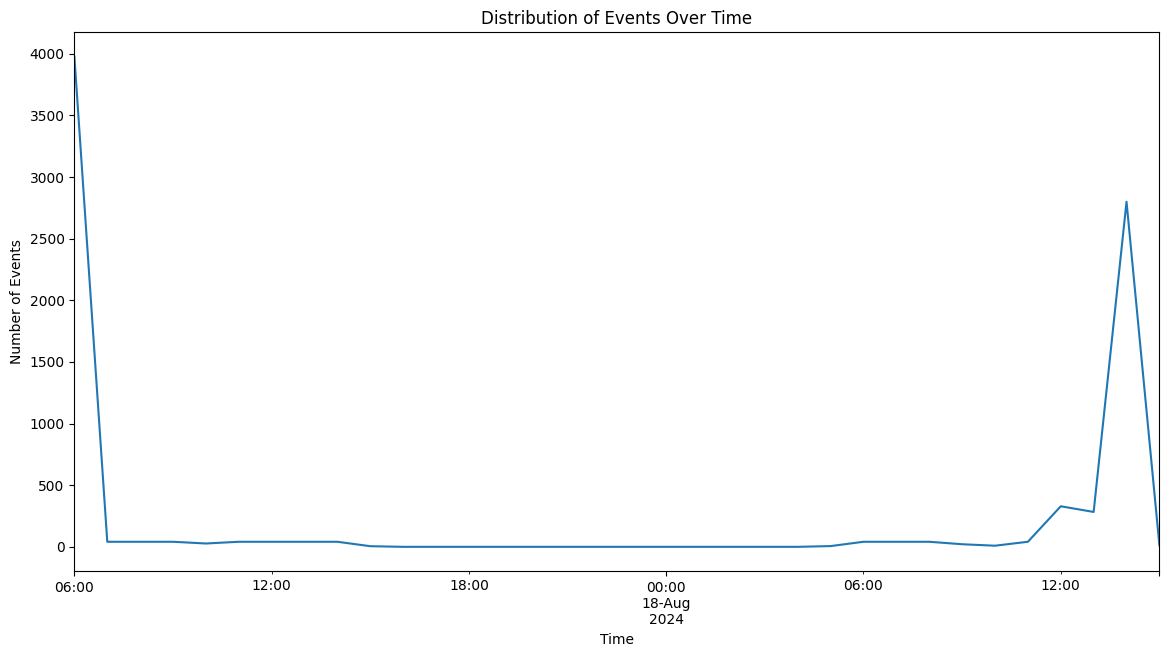

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة البيانات من ملف CSV
audit_data = pd.read_csv('audit_data_master_csv.csv')

# تحويل عمود event_time إلى صيغة datetime
audit_data['event_time'] = pd.to_datetime(audit_data['event_time'])

# تعيين event_time كفهرس للبيانات
audit_data.set_index('event_time', inplace=True)

# رسم توزيع الأحداث على مدار الوقت
plt.figure(figsize=(14, 7))
audit_data['sequence_number'].resample('H').count().plot()
plt.title('Distribution of Events Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()


In [24]:
import pandas as pd

# قراءة البيانات
df = pd.read_csv('audit_data_master_csv.csv')

# حذف أي صفوف تحتوي على قيم مفقودة في الأعمدة المهمة
df_cleaned = df.dropna(subset=['session_server_principal_name', 'action_id'])

# تجميع البيانات حسب المستخدم والنشاطات مع عدّ عدد مرات النجاح والفشل
user_activity = df_cleaned.groupby(['session_server_principal_name', 'action_id'])['succeeded'].value_counts().unstack().fillna(0)

# عرض النتائج
print(user_activity)


succeeded                                True
session_server_principal_name action_id      
DESKTOP-55IP1AV\pc            EX          236
                              SL         3066
NT Service\SQLTELEMETRY       EX            1
                              SL         4616


In [25]:

import pandas as pd

# قراءة البيانات
df = pd.read_csv('audit_data_master_csv.csv')

# تحليل نسبة النجاح والفشل
success_rate = df['succeeded'].value_counts(normalize=True) * 100
print("نسبة النجاح والفشل:")
print(success_rate)

# تحليل الارتباط بين succeeded و action_id
action_success = df.groupby(['action_id', 'succeeded']).size().unstack(fill_value=0)
print("\nتحليل الارتباط بين succeeded و action_id:")
print(action_success)

# إذا كان عمود permission_bitmask يحتوي على قيم
if not df['permission_bitmask'].isnull().all():
    permission_success = df.groupby(['permission_bitmask', 'succeeded']).size().unstack(fill_value=0)
    print("\nتحليل الارتباط بين succeeded و permission_bitmask:")
    print(permission_success)
else:
    print("\nعمود permission_bitmask يحتوي على قيم فارغة فقط، لا يمكن تحليل الارتباط.")

# # تحديد العمليات أو النشاطات التي تتطلب مزيدًا من الانتباه
# failed_actions = action_success[action_success[False] > 0]
# print("\nالعمليات التي تحتاج إلى مزيد من الانتباه:")
# print(failed_actions)



نسبة النجاح والفشل:
succeeded
True    100.0
Name: proportion, dtype: float64

تحليل الارتباط بين succeeded و action_id:
succeeded  True
action_id      
AUSC          1
EX          237
SL         7682

عمود permission_bitmask يحتوي على قيم فارغة فقط، لا يمكن تحليل الارتباط.


count    7920.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: duration_milliseconds, dtype: float64


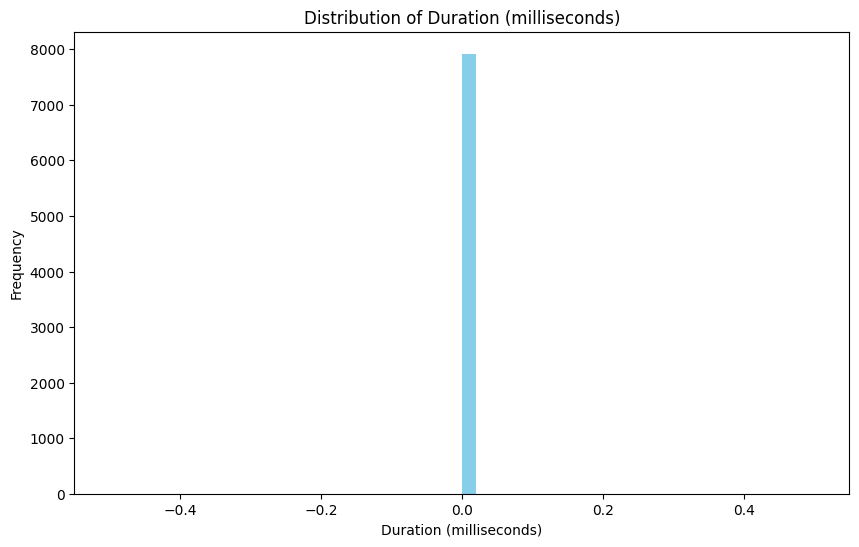

High duration operations:
Empty DataFrame
Columns: [session_id, duration_milliseconds, action_id]
Index: []
Top sessions by average duration:
session_id
9     0.0
51    0.0
88    0.0
87    0.0
85    0.0
84    0.0
83    0.0
73    0.0
72    0.0
71    0.0
Name: duration_milliseconds, dtype: float64


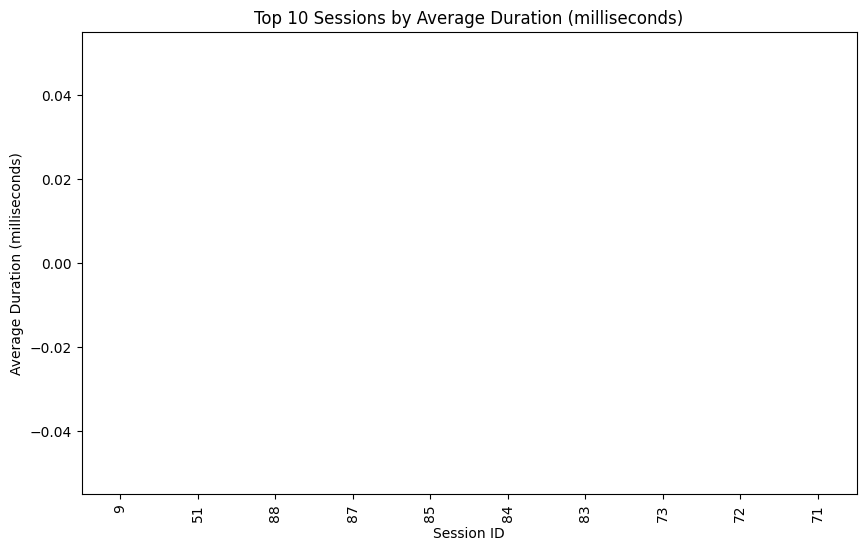

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# افترض أن البيانات تم تحميلها في DataFrame يسمى df
df = pd.read_csv('audit_data_master_csv.csv')

# عرض وصف عام لعمدة duration_milliseconds
print(df['duration_milliseconds'].describe())

# رسم بياني لتوزيع duration_milliseconds
plt.figure(figsize=(10, 6))
plt.hist(df['duration_milliseconds'], bins=50, color='skyblue')
plt.title('Distribution of Duration (milliseconds)')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Frequency')
plt.show()

# تحديد العمليات ذات الزمن المستغرق الطويل
high_duration_operations = df[df['duration_milliseconds'] > df['duration_milliseconds'].quantile(0.95)]
print("High duration operations:")
print(high_duration_operations[['session_id', 'duration_milliseconds', 'action_id']])

# تحليل العلاقة بين session_id و duration_milliseconds
session_duration_mean = df.groupby('session_id')['duration_milliseconds'].mean()
session_duration_mean_sorted = session_duration_mean.sort_values(ascending=False)

print("Top sessions by average duration:")
print(session_duration_mean_sorted.head(10))

# رسم بياني لجلسات محددة وزمنها المستغرق
plt.figure(figsize=(10, 6))
session_duration_mean_sorted.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Sessions by Average Duration (milliseconds)')
plt.xlabel('Session ID')
plt.ylabel('Average Duration (milliseconds)')
plt.show()


توزيع الأنشطة حسب client_ip:
client_ip
local machine    7875
172.23.0.1         44
Unknown             1
Name: count, dtype: int64

توزيع الأنشطة حسب host_name:
host_name
DESKTOP-55IP1AV    7919
Name: count, dtype: int64


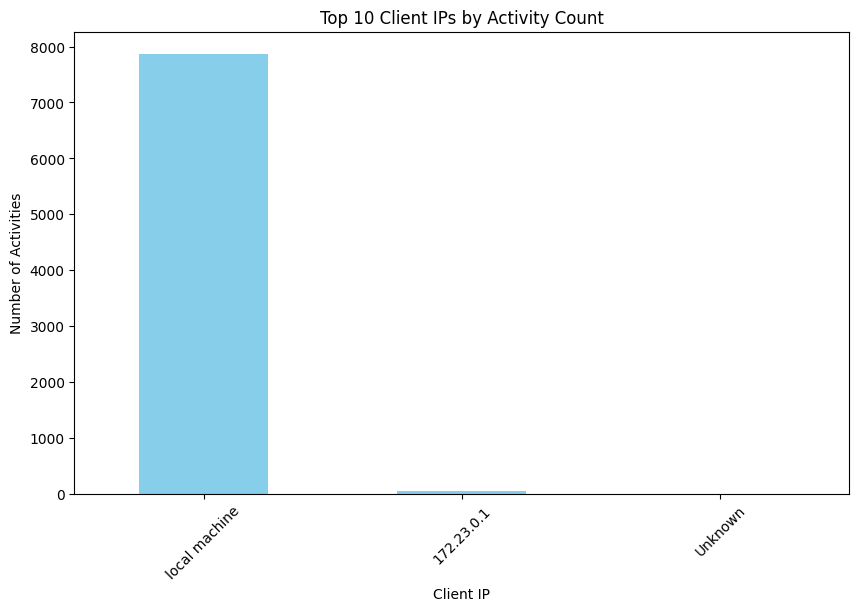

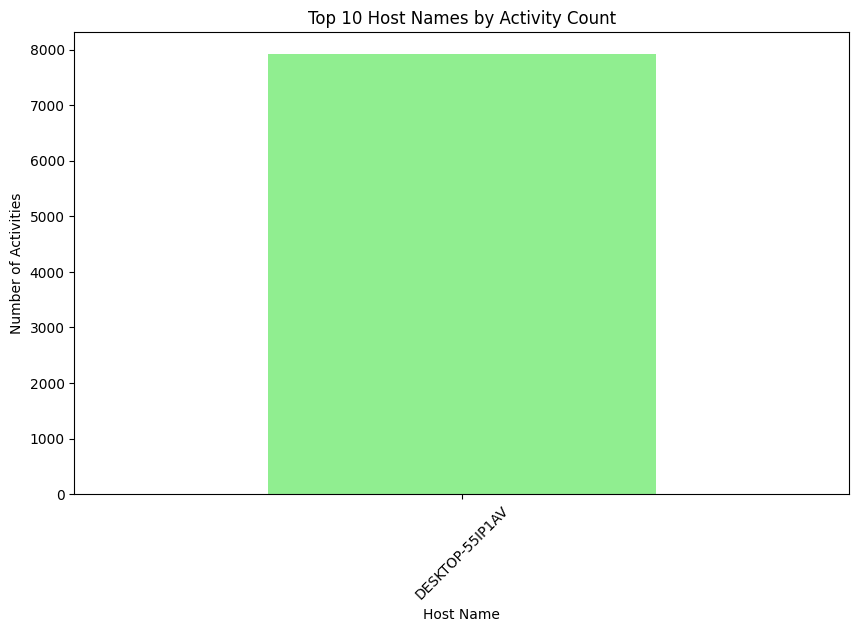

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# تحميل البيانات
df = pd.read_csv('audit_data_master_csv.csv')  # قم بتعديل اسم الملف حسب الحاجة

# تحليل توزيع الأنشطة حسب client_ip
client_ip_distribution = df['client_ip'].value_counts()
print("توزيع الأنشطة حسب client_ip:")
print(client_ip_distribution.head())

# تحليل توزيع الأنشطة حسب host_name
host_name_distribution = df['host_name'].value_counts()
print("\nتوزيع الأنشطة حسب host_name:")
print(host_name_distribution.head())

# إنشاء رسم بياني لتوزيع الأنشطة حسب client_ip
plt.figure(figsize=(10, 6))
client_ip_distribution.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Client IPs by Activity Count')
plt.xlabel('Client IP')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.show()

# إنشاء رسم بياني لتوزيع الأنشطة حسب host_name
plt.figure(figsize=(10, 6))
host_name_distribution.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Host Names by Activity Count')
plt.xlabel('Host Name')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.show()
